## Instalar los paquetes necesarios para que funcione el entorno de desarrollo

In [157]:
# !pip install pandas
# !pip install seaborn
# !pip install scikit-learn
# !pip install requests
# !pip install bs4

## Importamos las librerías necesarias

In [158]:
#data analysis libraries 
import numpy as np
import pandas as pd
import re

#visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#compilation libraries
import pickle

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Leemos los datos y empezamos a explorarlos

In [159]:
#import train and test CSV files
train = pd.read_csv("/workspaces/TitanicDeploy/Model/train.csv")
# test = pd.read_csv("/workspaces/TitanicDeploy/Model/test.csv")

#take a look at the training data
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Analisis de datos

In [160]:
#lista de columnas en la data
print(train.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [161]:
#vemos un ejemplo de datos para hacernos una idea de las variables
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
164,165,0,3,"Panula, Master. Eino Viljami",male,1.0,4,1,3101295,39.6875,NaN,S
279,280,1,3,"Abbott, Mrs. Stanton (Rosa Hunt)",female,35.0,1,1,C.A. 2673,20.2500,NaN,S
538,539,0,3,"Risien, Mr. Samuel Beard",male,NaN,0,0,364498,14.5000,NaN,S
321,322,0,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,NaN,S
758,759,0,3,"Theobald, Mr. Thomas Leonard",male,34.0,0,0,363294,8.0500,NaN,S


Datos numéricos: Age, Fare, SibSp, Parch
Datos Categóricos: Survived, Sex, Embarked, Pclass
Datos Alfanumericos: Ticket, Cabin

In [162]:
#vemos más en detalle el dataset
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Dooley, Mr. Patrick",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


Algunas observaciones:
Hay un total de 891 pasajeros en nuestro conjunto de entrenamiento.
A la característica Age (Edad) le faltan aproximadamente el 19.8% de sus valores. Supongo que la característica Age es bastante importante para la supervivencia, así que probablemente deberíamos intentar rellenar estos huecos.
A la característica Cabin (Cabina) le faltan aproximadamente el 77.1% de sus valores. Dado que falta tanto de esta característica, sería difícil rellenar los valores que faltan. Probablemente eliminemos estos valores de nuestro conjunto de datos.
A la característica Embarked (Embarque) le falta el 0.22% de sus valores, lo cual no debería ser un problema grave.

In [163]:
#Revisar si hay valores Null
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Podemos ver que, excepto por los valores faltantes mencionados anteriormente, no existen valores NaN.

### Algunas predicciones:
Sex (Sexo): Las mujeres tienen más probabilidades de sobrevivir.

SibSp/Parch: Las personas que viajan solas tienen más probabilidades de sobrevivir.

Age (Edad): Los niños pequeños tienen más probabilidades de sobrevivir.

Pclass (Clase): Las personas de una clase socioeconómica más alta tienen más probabilidades de sobrevivir.

## Visualización de Datos
¡Es hora de visualizar nuestros datos para ver si nuestras predicciones fueron acertadas!

### Sex

Porcentaje de mujeres que sobrevivieron: 74.20382165605095
Porcentaje de hombres que sobrevivieron: 18.890814558058924


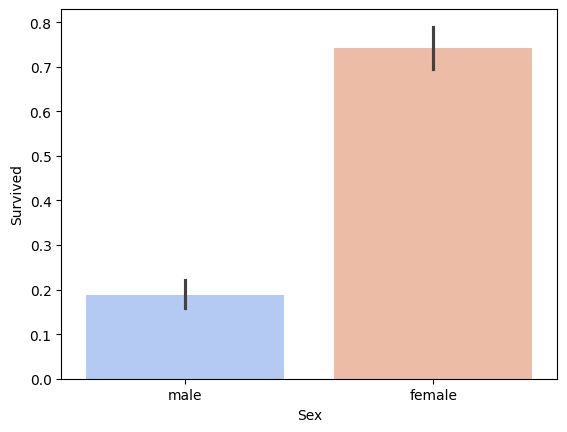

In [164]:
#dibujar un gráfico de barras de supervivencia por sexo
sns.barplot(x="Sex", y="Survived", data=train, palette="coolwarm")

#imprimir porcentajes de mujeres vs. hombres que sobrevivieron
print("Porcentaje de mujeres que sobrevivieron:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Porcentaje de hombres que sobrevivieron:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

### PClass

Porcentaje de Pclass = 1 que sobrevivieron: 62.96296296296296
Porcentaje de Pclass = 2 que sobrevivieron: 47.28260869565217
Porcentaje de Pclass = 3 que sobrevivieron: 24.236252545824847


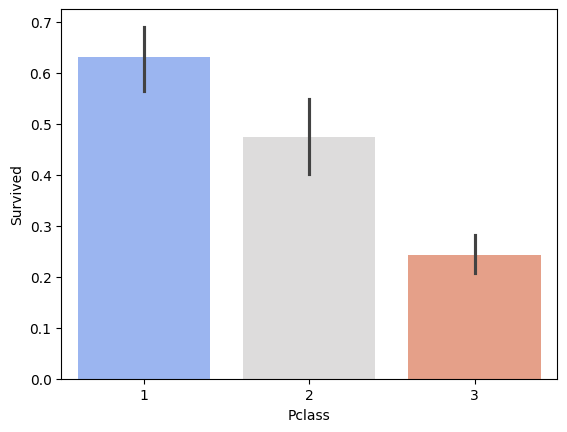

In [165]:
#dibujar un gráfico de barras de supervivencia por clase (Pclass)
sns.barplot(x="Pclass", y="Survived", data=train, palette="coolwarm")

#imprimir porcentaje de personas por Pclass que sobrevivieron
print("Porcentaje de Pclass = 1 que sobrevivieron:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Porcentaje de Pclass = 2 que sobrevivieron:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Porcentaje de Pclass = 3 que sobrevivieron:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)


Como se predijo, las personas de clase socioeconómica más alta tuvieron una mayor tasa de supervivencia. (62.9% vs. 47.3% vs. 24.2%)

### SibSp

Porcentaje de SibSp = 0 que sobrevivieron: 34.53947368421053
Porcentaje de SibSp = 1 que sobrevivieron: 53.588516746411486
Porcentaje de SibSp = 2 que sobrevivieron: 46.42857142857143


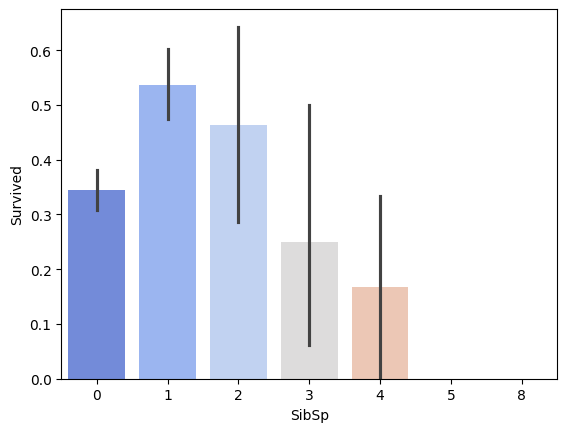

In [166]:
#dibujar un gráfico de barras para SibSp vs. supervivencia
sns.barplot(x="SibSp", y="Survived", data=train, palette="coolwarm")

#No imprimiré los valores porcentuales individuales para todos estos.
print("Porcentaje de SibSp = 0 que sobrevivieron:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Porcentaje de SibSp = 1 que sobrevivieron:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Porcentaje de SibSp = 2 que sobrevivieron:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

En general, está claro que las personas con más hermanos o cónyuges a bordo tenían menos probabilidades de sobrevivir. Sin embargo, contrariamente a lo esperado, las personas sin hermanos o cónyuges tenían menos probabilidades de sobrevivir que aquellas con uno o dos. (34.5% vs. 53.4% vs. 46.4%)

### Parch 

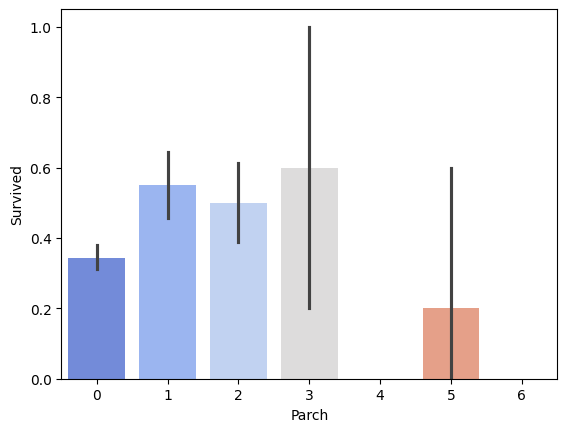

In [167]:
#dibujar un gráfico de barras para Parch vs. supervivencia
sns.barplot(x="Parch", y="Survived", data=train, palette="coolwarm")
plt.show()

Las personas con menos de cuatro padres o hijos a bordo tienen más probabilidades de sobrevivir que aquellas con cuatro o más. Nuevamente, las personas que viajan solas tienen menos probabilidades de sobrevivir que aquellas con 1-3 padres o hijos.

### Age

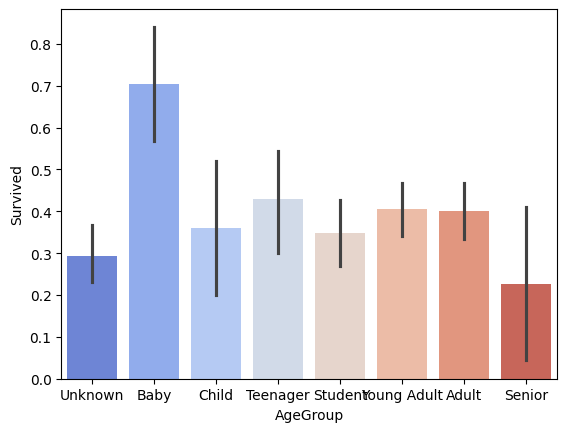

In [168]:
#ordenar las edades en categorías lógicas
train["Age"] = train["Age"].fillna(-0.5)
# test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
# test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)

#dibujar un gráfico de barras de AgeGroup vs. supervivencia
sns.barplot(x="AgeGroup", y="Survived", data=train, palette="coolwarm")
plt.show()

Los bebés tienen más probabilidades de sobrevivir que cualquier otro grupo de edad.

### Cabin

Porcentaje de CabinBool = 1 que sobrevivieron: 66.66666666666666
Porcentaje de CabinBool = 0 que sobrevivieron: 29.985443959243085


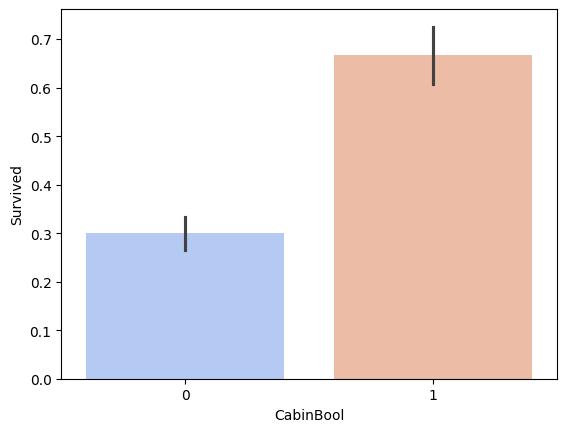

In [169]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
# test["CabinBool"] = (test["Cabin"].notnull().astype('int'))

#calcular porcentajes de CabinBool vs. supervivencia
print("Porcentaje de CabinBool = 1 que sobrevivieron:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Porcentaje de CabinBool = 0 que sobrevivieron:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

#dibujar un gráfico de barras de CabinBool vs. supervivencia
sns.barplot(x="CabinBool", y="Survived", data=train, palette="coolwarm")
plt.show()

People with a recorded Cabin number are, in fact, more likely to survive. (66.6% vs 29.9%)

## Limpieza de Datos

¡Es hora de limpiar nuestros datos para tener en cuenta los valores faltantes y la información innecesaria!

In [170]:
# test.describe(include="all")

Tenemos un total de 418 pasajeros.  
Falta 1 valor en la característica Fare (Tarifa).  
Aproximadamente el 20.5% de la característica Age (Edad) está faltante, por lo que necesitaremos rellenar esos valores.

### Cabin 

In [171]:
#comenzaremos eliminando la característica Cabin, ya que no se puede extraer mucha más información útil de ella.
train = train.drop(['Cabin'], axis = 1)
# test = test.drop(['Cabin'], axis = 1)

Ticket

In [172]:
#también podemos eliminar la característica Ticket, ya que es poco probable que proporcione información útil
train = train.drop(['Ticket'], axis = 1)
# test = test.drop(['Ticket'], axis = 1)

Embarked

In [173]:
#ahora necesitamos rellenar los valores faltantes en la característica Embarked
print("Número de personas que embarcan en Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Número de personas que embarcan en Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Número de personas que embarcan en Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Número de personas que embarcan en Southampton (S):
644
Número de personas que embarcan en Cherbourg (C):
168
Número de personas que embarcan en Queenstown (Q):
77


Está claro que la mayoría de las personas embarcaron en Southampton (S). Vamos a rellenar los valores faltantes con S.

In [174]:
#reemplazando los valores faltantes en la característica Embarked con S
train = train.fillna({"Embarked": "S"})

A continuación, rellenaremos los valores faltantes en la característica Age. Dado que un mayor porcentaje de valores está faltante, sería ilógico rellenar todos con el mismo valor (como hicimos con Embarked). En su lugar, intentemos encontrar una manera de predecir las edades faltantes.

In [175]:
#crear un grupo combinado de los dos datasets
combine = [train,] #test

#extraer un título para cada nombre en los conjuntos de datos train y test
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [176]:
#reemplazar varios títulos con nombres más comunes
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [177]:
#asignar un valor numérico a cada grupo de títulos
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [178]:
# rellenar la edad faltante con el grupo de edad más común para cada título
mr_age = train[train["Title"] == 1]["AgeGroup"].mode()  # Young Adult
miss_age = train[train["Title"] == 2]["AgeGroup"].mode()  # Student
mrs_age = train[train["Title"] == 3]["AgeGroup"].mode()  # Adult
master_age = train[train["Title"] == 4]["AgeGroup"].mode()  # Baby
royal_age = train[train["Title"] == 5]["AgeGroup"].mode()  # Adult
rare_age = train[train["Title"] == 6]["AgeGroup"].mode()  # Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}

# Intenté hacer que este código funcionara usando .map(), pero no pude.
# He puesto una solución temporal menos elegante por ahora.

for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]

""" for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]] """

' for x in range(len(test["AgeGroup"])):\n    if test["AgeGroup"][x] == "Unknown":\n        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]] '

Ahora que hemos rellenado los valores faltantes de manera al menos algo precisa (trabajaré en una mejor manera de predecir los valores faltantes de edad), es hora de asignar a cada grupo de edad un valor numérico.

In [179]:
#asignar a cada valor de AgeGroup un valor numérico
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
# test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()

#eliminar la característica Age por ahora, esto podría cambiar
train = train.drop(['Age'], axis = 1)
# test = test.drop(['Age'], axis = 1)

## Name

In [180]:
#dropeamos el nombre que ya no nos vale
train = train.drop(['Name'], axis = 1)
# test = test.drop(['Name'], axis = 1)

## Sex

In [181]:
#asignar a cada valor de Sex un valor numérico
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
# test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


## Embarked

In [182]:
#asignar cada Embarked a un valor numérico
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
# test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


## Fare
Es hora de separar los valores de Fare (Tarifa) en algunos grupos lógicos, así como de rellenar el único valor faltante en el conjunto de datos de test.

In [183]:
""" #rellenar el valor faltante de Fare en el conjunto de test basado en la tarifa media de esa Pclass
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x]  # Pclass = 3
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4) """

#asignar los valores de Fare en grupos de valores numéricos
train['FareBand'] = pd.qcut(train['Fare'], 4, labels=[1, 2, 3, 4])
# test['FareBand'] = pd.qcut(test['Fare'], 4, labels=[1, 2, 3, 4])

#eliminar los valores de Fare
train = train.drop(['Fare'], axis=1)
# test = test.drop(['Fare'], axis=1)

In [184]:
#check train data
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


## Elegir el mejor Modelo

División de los datos de entrenamiento

Usaremos una parte de nuestros datos de entrenamiento (22% en este caso) para probar la precisión de nuestros diferentes modelos.

In [185]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

Probando diferentes modelos

Voy a probar los siguientes modelos con mis datos de entrenamiento:

- Gaussian Naive Bayes  
- Logistic Regression  
- Support Vector Machines  
- Perceptron  
- Decision Tree Classifier  
- Random Forest Classifier  
- KNN o k-Nearest Neighbors  
- Stochastic Gradient Descent  
- Gradient Boosting Classifier  

Para cada modelo, configuramos el modelo, lo entrenamos con el 80% de nuestros datos de entrenamiento, realizamos predicciones con el 20% restante de los datos y verificamos la precisión.

In [186]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


In [187]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.7


In [188]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.74


In [189]:
# Linear SVC
from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.68


In [190]:
# Perceptron
from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

78.68


In [191]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.2


In [192]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

82.74


In [193]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

82.23


In [194]:
# Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

79.7


In [195]:
# Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.26


In [196]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'Linear SVC', 
              'Decision Tree', 'Stochastic Gradient Descent', 'Gradient Boosting Classifier'],
    'Score': [acc_svc, acc_knn, acc_logreg, 
              acc_randomforest, acc_gaussian, acc_perceptron,acc_linear_svc, acc_decisiontree,
              acc_sgd, acc_gbk]})
models.sort_values(by='Score', ascending=False)

,Model,Score
9,Gradient Boosting Classifier,84.26
0,Support Vector Machines,82.74
3,Random Forest,82.74
1,KNN,82.23
7,Decision Tree,80.20
2,Logistic Regression,79.70
8,Stochastic Gradient Descent,79.70
4,Naive Bayes,78.68
5,Perceptron,78.68
6,Linear SVC,78.68


In [197]:
# Reentrenar el modelo seleccionado con el 100% de los datos
gbk = GradientBoostingClassifier()
gbk.fit(predictors, target)  # Usamos todos los datos (sin dividir)

GradientBoostingClassifier()

In [198]:
# Crear y reentrenar el modelo SVM con el 100% de los datos
svc = SVC()
svc = SVC(probability=True)
svc.fit(predictors, target)  # Reentrenamos usando todos los datos

SVC(probability=True)

In [199]:
# Guardar el modelo en un archivo .pkl
with open('svc_model.pkl', 'wb') as file:  # Abre el archivo en modo de escritura binaria
    pickle.dump(svc, file)  # Guarda el modelo entrenado

In [200]:
# Guardar el modelo en un archivo .pkl
with open('gbk_model.pkl', 'wb') as file:  # Abre el archivo en modo de escritura binaria
    pickle.dump(gbk, file)  # Guarda el modelo entrenado